# The Task

Scenario
- The Head of Sales at superstore would like to understand how the store has been perfoming since his appointment in 2015. He tasked you with the responsibility of analysing the store's data and gathering insights. He would like to know performance by region, state, category, segment, time and additional information that you can gather.


- The following notebook details my analysis process of a superstore in the United States of America. The data was sourced from Kaggle.
- In this analysis process, the data is cleaned, analyzed and visualized using various libraries and languages.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from pandasql import sqldf
import plotly.graph_objects as go
import streamlit as st
#for github
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Data cleaning

Steps
- Handling missing values
- Handling data types

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df['Postal Code'].mode()

0    10035.0
Name: Postal Code, dtype: float64

In [8]:
#There is only one column with missing values. I decided to fill that column with the mode value. 
#This is because only 11 rows didn't have values
df['Postal Code'].fillna(df['Postal Code'].mode()[0],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
#change data type of columns
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Postal Code']= df['Postal Code'].astype(int)
df['Sales'] =df['Sales'].round(decimals=0)
df['Sales'] = df['Sales'].astype(int)

In [11]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int32
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                     int32
dtype: object

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22


# Exploratory Data Analysis

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22


In [14]:
df2=df.copy()
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22


In [15]:
#df2.to_csv("superstore.csv")

In [16]:
plt.style.use('seaborn')

Time Analysis

Questions

1. What is the year, month and day with the highest sales

2. What is the sales trend between 2015 and 2018?

3. What is the order fulfillment period (Period between order and ship date)

Creating new columns to show the year , month and day of order and shipment

In [17]:
df2['order_year'] = pd.DatetimeIndex(df2['Order Date']).year
df2['order_month'] =pd.DatetimeIndex(df2['Order Date']).month
df2['order_day'] = pd.DatetimeIndex(df2['Order Date']).day
df2['ship_year'] =pd.DatetimeIndex(df2['Ship Date']).year
df2['ship_month'] =pd.DatetimeIndex(df2['Ship Date']).month
df2.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,order_day,ship_year,ship_month
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",4,2017,5,21,2017,5
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10,2016,1,12,2016,1
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235,2016,1,12,2016,1
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26,2016,1,12,2016,1
9799,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10,2016,1,12,2016,1


In [18]:
year_sales = df2[['order_year', 'Sales']].groupby('order_year').sum().reset_index()
year_sales

,order_year,Sales
0,2015,479859
1,2016,459462
2,2017,600237
3,2018,722115


In [19]:
#year_sales.to_csv('year_sales.csv')

In [20]:
time = df2[['order_year', 'order_month', 'Sales']].groupby(['order_year', 'order_month']).sum().reset_index()
time.head()

,order_year,order_month,Sales
0,2015,1,14207
1,2015,2,4518
2,2015,3,55203
3,2015,4,27906
4,2015,5,23644


In [21]:
#time.to_csv('time.csv')

Text(0.5, 1.0, 'Lineplot showing Sales Orders Over The years')

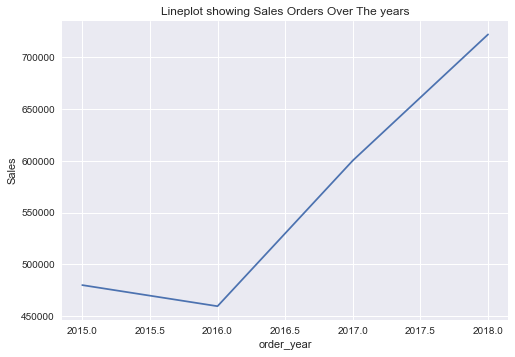

In [22]:
sns.lineplot(data=year_sales, x='order_year', y='Sales', ci=None)
plt.title('Lineplot showing Sales Orders Over The years')

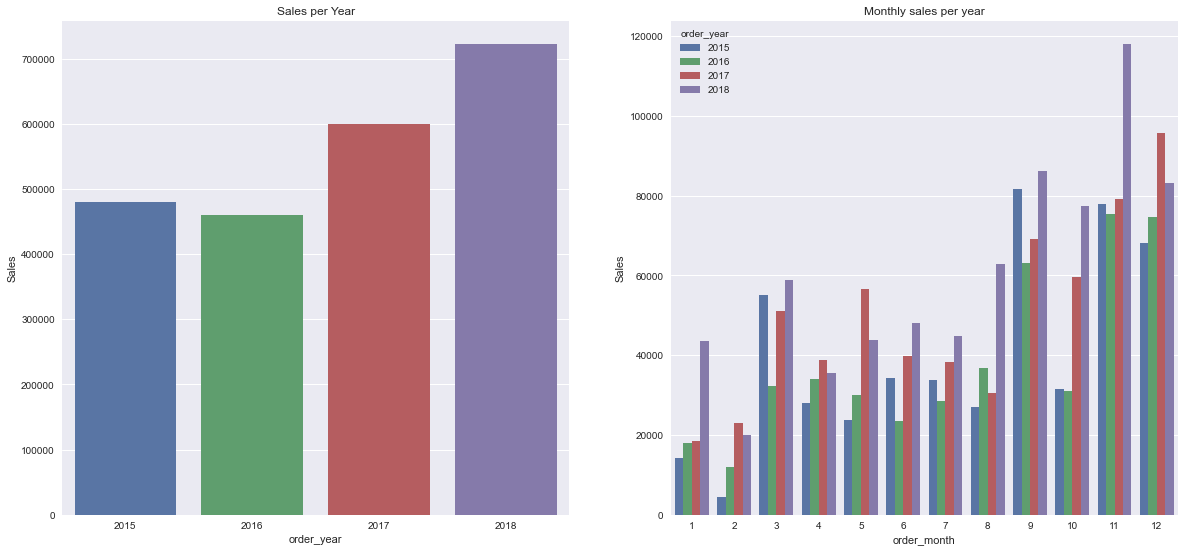

In [23]:
fig = plt.figure(figsize=(20,20))

ax= plt.subplot(221)
ax=sns.barplot(data=year_sales, x='order_year',y='Sales')
ax=plt.title('Sales per Year')

ax1=plt.subplot(222)
ax1=sns.barplot(data=time, x='order_month', y='Sales', hue='order_year')
ax1=plt.title('Monthly sales per year')

In [24]:
df2['delivery_duration'] = df['Ship Date'] - df['Order Date']
df2['delivery_duration']

0      3 days
1      3 days
2      4 days
3      7 days
4      7 days
        ...  
9795   7 days
9796   5 days
9797   5 days
9798   5 days
9799   5 days
Name: delivery_duration, Length: 9800, dtype: timedelta64[ns]

In [25]:
df2['delivery_duration']=df2['delivery_duration'].values.astype(float)

In [26]:
#df2.to_csv('df2.csv')

In [27]:
df2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,order_year,order_month,order_day,ship_year,ship_month,delivery_duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2017,11,8,2017,11,2.592000e+14
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,2017,11,8,2017,11,2.592000e+14
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2017,6,12,2017,6,3.456000e+14
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,2016,10,11,2016,10,6.048000e+14
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2016,10,11,2016,10,6.048000e+14


Text(0.5, 1.0, 'Boxplot Showing Delivery Duration Distribution')

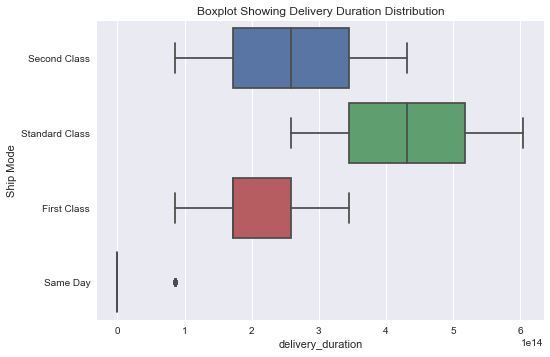

In [28]:
sns.boxplot(data=df2, x='delivery_duration', y='Ship Mode')
plt.title('Boxplot Showing Delivery Duration Distribution')

# Segment and Category Analysis 

Questions
1. Which segment has the highest sales?

2. Show sales in each segment by category

3. What is the highest selling sub-category and which sub-category sells the most

In [29]:
seg_df = """ SELECT Segment, sum(sales) AS'Total_Sales' FROM df GROUP BY Segment; """
seg_df = sqldf(seg_df)
seg_df

,Segment,Total_Sales
0,Consumer,1148144
1,Corporate,688531
2,Home Office,424998


In [30]:
seg_cat = df2[['Segment','Category', 'Sales']].groupby(['Segment','Category']).sum().reset_index()
seg_cat.head()

,Segment,Category,Sales
0,Consumer,Furniture,387704
1,Consumer,Office Supplies,359399
2,Consumer,Technology,401041
3,Corporate,Furniture,220312
4,Corporate,Office Supplies,224155


In [31]:
#seg_cat.to_csv('seg_cat.csv')

In [32]:
fig = px.sunburst(seg_cat, path=['Segment', 'Category'], values='Sales',)
fig.show()

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [33]:
cat_sub = """SELECT Category, "Sub-Category",  sum(Sales) as 'Total_Sales' FROM df GROUP BY Category, "Sub-Category" Order by sum(Sales) Desc; """

cat_sub = sqldf(cat_sub)
cat_sub.head()

,Category,Sub-Category,Total_Sales
0,Technology,Phones,327821
1,Furniture,Chairs,322827
2,Office Supplies,Storage,219360
3,Furniture,Tables,202811
4,Office Supplies,Binders,200044


In [34]:
#cat_sub.to_csv('cat_sub.csv')

In [35]:
fig = px.icicle(cat_sub, path=[px.Constant('Total_Sales'), 'Category', 'Sub-Category'], values='Total_Sales', title='Sales by Category and Sub-Category')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=15))
fig.show()

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
fig = px.sunburst(cat_sub, path=['Category', 'Sub-Category'], values='Total_Sales', title="Pie Chart showing Category and Sub-Category Sales")
fig.show()

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\imand\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
fig = px.funnel(cat_sub, x='Total_Sales', y='Sub-Category', title="Sub-Category Sales Breakdown")
fig.show()

# Product Analysis

Questions
1. Most bought product
2. Most expensive product
3. Number of times a product was bought

In [38]:
product_count = df2.groupby('Product Name').agg({'Product ID': 'count', 'Sales': sum}).reset_index()
product_count = product_count.sort_values('Product ID', ascending=False)
product_count.head()

,Product Name,Product ID,Sales
1492,Staple envelope,47,1673
1498,Staples,46,755
537,Easy-staple paper,44,2413
259,Avery Non-Stick Binders,20,218
1495,Staple remover,18,263


In [39]:
expensive_prod = """ SELECT Segment, City, State, Region, Category, "Sub-Category", "Product ID", "Product Name", Sales FROM df2 WHERE sales = (SELECT MAX(sales) FROM df2); """

expensive_prod = sqldf(expensive_prod)
expensive_prod

,Segment,City,State,Region,Category,Sub-Category,Product ID,Product Name,Sales
0,Home Office,Jacksonville,Florida,South,Technology,Machines,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638


In [40]:
#Number of product sales and sales generated
product_sales = df2.groupby('Product Name').agg({'Product ID':'count','Ship Mode':max,'Segment':max, 'City':max, 'State':max, 'Region':max, 'Category':max, 'Sub-Category':max, 'Sales':sum })
prodouct_sales = product_sales.sort_values('Sales', ascending =False).reset_index()
product_sales

,Product ID,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales
Product Name,,,,,,,,,
"""While you Were Out"" Message Book, One Form per Page",3,Standard Class,Corporate,San Francisco,Tennessee,West,Office Supplies,Paper,25
"#10 Gummed Flap White Envelopes, 100/Box",4,Standard Class,Corporate,New York City,Texas,East,Office Supplies,Envelopes,42
#10 Self-Seal White Envelopes,4,Standard Class,Home Office,Troy,Virginia,West,Office Supplies,Envelopes,109
"#10 White Business Envelopes,4 1/8 x 9 1/2",6,Standard Class,Home Office,San Francisco,New York,West,Office Supplies,Envelopes,379
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,Standard Class,Home Office,Springfield,Texas,West,Office Supplies,Envelopes,285
...,...,...,...,...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",5,Standard Class,Home Office,Trenton,New Mexico,West,Technology,Phones,479
iOttie HLCRIO102 Car Mount,5,Standard Class,Corporate,Utica,Pennsylvania,West,Technology,Phones,216
iOttie XL Car Mount,2,Standard Class,Consumer,Seattle,Washington,West,Technology,Phones,224


# Analysis by Region

Questions
1. Best performing region
2. Customers in each region
3. Top selling states
4. Best selling products in each region
5. Top 10 selling cities in each region

In [41]:
region = df2[['Region', 'Sales']]
region = region.groupby('Region').sum()
region = region.reset_index()
region

,Region,Sales
0,Central,492659
1,East,669565
2,South,389178
3,West,710271


In [42]:
#region.to_csv('region.csv')

Text(0.5, 1.0, 'Sales by Region')

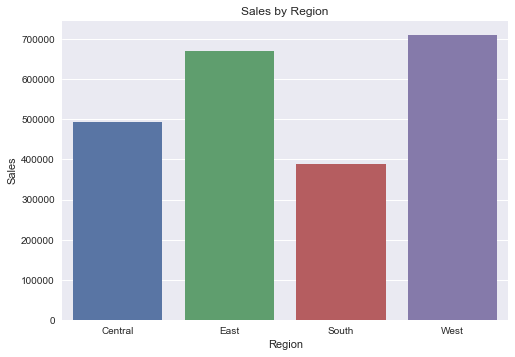

In [43]:
sns.barplot(data=region, x='Region', y='Sales', ci=None)
plt.title('Sales by Region')

In [44]:
cust_reg = df2.groupby('Region').agg({'Customer ID': 'nunique', 'Sales':sum}).reset_index()
cust_reg = cust_reg.sort_values('Customer ID', ascending=False)
cust_reg

,Region,Customer ID,Sales
3,West,681,710271
1,East,669,669565
0,Central,626,492659
2,South,509,389178


In [45]:
#cust_reg.to_csv('cust_reg.csv')

In [46]:
fig = px.pie(cust_reg, values='Customer ID', names='Region',
             title='Number of Customers By Region',
             hover_data=['Sales'], labels={'Sales':'Total Sales'})

fig.show()

In [47]:
west = df2[df2['Region']=='West']
east = df2[df2['Region']=='East']
south = df2[df2['Region']=='South']
central = df2[df2['Region']=='Central']

print(central.shape)
print(west.shape)
print(east.shape)
print(south.shape)

(2277, 24)
(3140, 24)
(2785, 24)
(1598, 24)


In [48]:
west_states = west[['State', 'Sales']].groupby('State').sum().reset_index()
west_states = west_states.sort_values('Sales', ascending = False)

east_states = east[['State', 'Sales']].groupby('State').sum().reset_index()
east_states = east_states.sort_values('Sales', ascending = False)

south_states = south[['State', 'Sales']].groupby('State').sum().reset_index()
south_states = south_states.sort_values('Sales', ascending = False)

central_states = central[['State', 'Sales']].groupby('State').sum().reset_index()
central_states = central_states.sort_values('Sales', ascending = False)

west_states

,State,Sales
1,California,446346
9,Washington,135221
0,Arizona,35274
2,Colorado,31843
7,Oregon,17284
5,Nevada,16729
8,Utah,11223
4,Montana,5589
6,New Mexico,4779
3,Idaho,4380


In [49]:
#central_states.to_csv('central.csv')
#south_states.to_csv('south.csv')
#west_states.to_csv('west.csv')
#east_states.to_csv('east.csv')

In [50]:
fig = px.bar(west_states, x='State', y='Sales', title='Sales in the West Region')
fig.show()

In [51]:
#Top performing State and Cities in the West
west_state_city = west[['State', 'City', 'Sales']].groupby(['State', 'City']).sum().reset_index()
west_state_city = west_state_city.sort_values('Sales', ascending=False)
west_state_city_top = west_state_city.nlargest(10, 'Sales')
west_state_city_bottom = west_state_city.nsmallest(10, 'Sales')
west_state_city.head()

east_state_city = east[['State', 'City', 'Sales']].groupby(['State', 'City']).sum().reset_index()
east_state_city = east_state_city.sort_values('Sales', ascending=False)
east_state_city_top = east_state_city.nlargest(10, 'Sales')
east_state_city_bottom = east_state_city.nsmallest(10, 'Sales')

south_state_city = south[['State', 'City', 'Sales']].groupby(['State', 'City']).sum().reset_index()
south_state_city = south_state_city.sort_values('Sales', ascending=False)
south_state_city_top = south_state_city.nlargest(10, 'Sales')
south_state_city_bottom = south_state_city.nsmallest(10, 'Sales')

central_state_city = central[['State', 'City', 'Sales']].groupby(['State', 'City']).sum().reset_index()
central_state_city = central_state_city.sort_values('Sales', ascending=False)
central_state_city_top = central_state_city.nlargest(10, 'Sales')
central_state_city_bottom = central_state_city.nsmallest(10, 'Sales')


In [52]:
#west_state_city_top.to_csv('wsct.csv')
#west_state_city_bottom.to_csv('wscb.csv')

#east_state_city_top.to_csv('esct.csv')
#east_state_city_bottom.to_csv('escb.csv')

#south_state_city_top.to_csv('ssct.csv')
#south_state_city_bottom.to_csv('sscb.csv')

#central_state_city_top.to_csv('csct.csv')
#central_state_city_bottom.to_csv('cscb.csv')

In [53]:
fig = plt.figure(figsize=(20,20))

#ax=fig.add_subplot(221)
ax=px.bar(west_state_city_top, x='City', y='Sales', title='Top Performing Cities in the West', height=400)
ax.show()

#ax=fig.add_subplot(222)
ax=px.bar(west_state_city_bottom, x='City', y='Sales', title='Least Performing Cities in the West', height=400)
ax.show()




<Figure size 1440x1440 with 0 Axes>

In [54]:
w = west[['Segment','Category', 'Sales']].groupby(['Segment', 'Category']).sum()
w = w.reset_index()



e = east[['Segment','Category', 'Sales']].groupby(['Segment', 'Category']).sum()
e = e.reset_index()



c = central[['Segment','Category', 'Sales']].groupby(['Segment', 'Category']).sum()
c = c.reset_index()


s = south[['Segment','Category', 'Sales']].groupby(['Segment', 'Category']).sum()
s = s.reset_index()


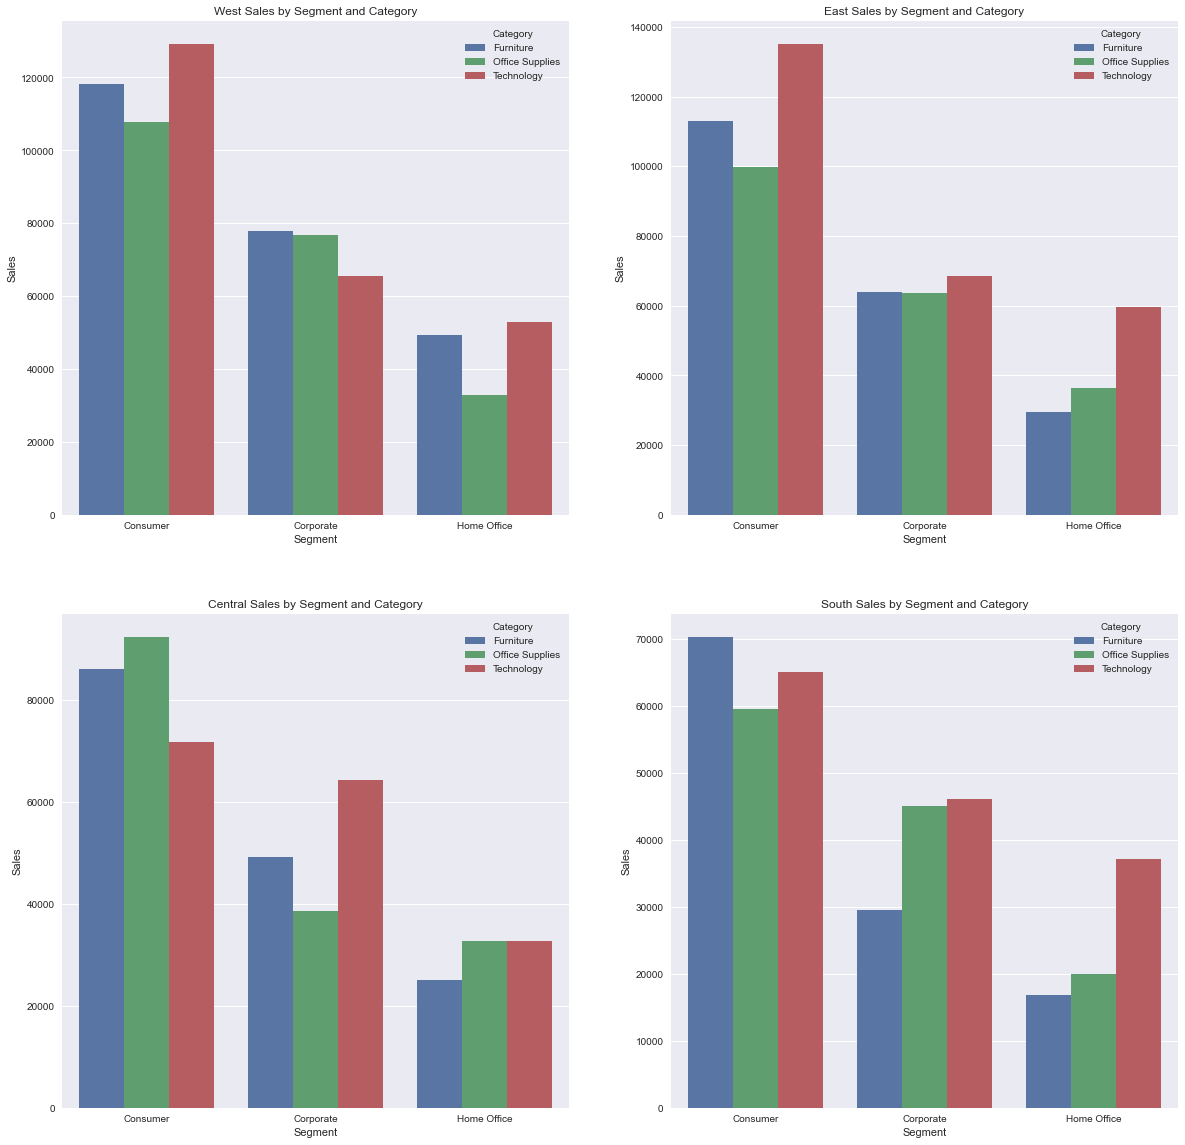

In [55]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax1 = sns.barplot(data= w, x='Segment', y='Sales', hue='Category', ci=None)
ax1 = plt.title('West Sales by Segment and Category')

ax2 = fig.add_subplot(222)
ax2 = sns.barplot(data= e, x='Segment', y='Sales', hue='Category',ci=None)
ax2 = plt.title('East Sales by Segment and Category')


ax3 = fig.add_subplot(223)
ax3 = sns.barplot(data= c, x='Segment', y='Sales', hue='Category',ci=None)
ax3 = plt.title('Central Sales by Segment and Category')


ax4 = fig.add_subplot(224)
ax4 = sns.barplot(data= s, x='Segment', y='Sales', hue='Category',ci=None)
ax4 = plt.title('South Sales by Segment and Category')

In [56]:
west.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,order_year,order_month,order_day,ship_year,ship_month,delivery_duration
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2017,6,12,2017,6,3.456000e+14
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,49,2015,6,9,2015,6,4.320000e+14
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Art,Newell 322,7,2015,6,9,2015,6,4.320000e+14
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907,2015,6,9,2015,6,4.320000e+14
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,19,2015,6,9,2015,6,4.320000e+14


In [57]:
#Top performing State and Cities in the West
west_state_city = west[['State', 'City', 'Sales']].groupby(['State', 'City']).sum().reset_index()
west_state_city = west_state_city.sort_values('Sales', ascending=False)
west_state_city_top = west_state_city.nlargest(10, 'Sales')
west_state_city_bottom = west_state_city.nsmallest(10, 'Sales')
west_state_city.head()

,State,City,Sales
45,California,Los Angeles,173426
165,Washington,Seattle,116117
72,California,San Francisco,109061
71,California,San Diego,47521
98,Colorado,Denver,12199


In [58]:
#Most bought products in the west
west_cust_prods = west.groupby('Product Name').agg({'Product ID':'count', 'Customer ID': 'count', 'Segment':max,'Category':max, 'Sub-Category':max, 'Sales': sum}).reset_index()
west_cust_prods = west_cust_prods.sort_values('Product ID', ascending=False)
west_cust_prods.head(10)

,Product Name,Product ID,Customer ID,Segment,Category,Sub-Category,Sales
1211,Staples,13,13,Home Office,Office Supplies,Fasteners,170
1205,Staple envelope,9,9,Corporate,Office Supplies,Envelopes,293
431,Easy-staple paper,9,9,Home Office,Office Supplies,Paper,543
212,Avery Non-Stick Binders,8,8,Corporate,Office Supplies,Binders,83
1108,SAFCO Arco Folding Chair,7,7,Home Office,Furniture,Chairs,5746
1468,Xerox 225,7,7,Home Office,Office Supplies,Paper,157
333,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",7,7,Home Office,Office Supplies,Binders,136
623,Global Troy Executive Leather Low-Back Tilter,7,7,Home Office,Furniture,Chairs,10021
1290,Vinyl Sectional Post Binders,7,7,Home Office,Office Supplies,Binders,648
297,Bretford Rectangular Conference Table Tops,7,7,Home Office,Furniture,Tables,7711


In [59]:
#Number of products bought by customers in the west
west_cust_prodss = west.groupby('Customer ID').agg({'Product ID':'count', 'Sales': sum}).reset_index()
west_cust_prodss = west_cust_prodss.sort_values('Product ID', ascending=False)
west_cust_prodss.head(10)

,Customer ID,Product ID,Sales
675,WB-21850,24,5522
36,AP-10915,23,2371
568,RW-19540,19,5350
254,GG-14650,17,1793
199,DS-13030,16,1362
679,ZC-21910,16,2644
391,LC-16870,15,1144
550,RD-19900,15,2188
130,CL-12565,15,6070
28,AI-10855,15,3800


# Customer Analysis; Recency,Frequency and Monetary

RFM Modelling

RFM is a method used for analyzing customer value. RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary Value – How much do they spend?

In [60]:
df['Order Date'].max()    

Timestamp('2018-12-30 00:00:00')

In [61]:
#Recency = Latest Date - Last Inovice Data,
#Frequency = count of invoice no. of transaction(s),
#Monetary = Sum of Total Amount for each customer

import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2018,12,31)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('Customer ID').agg({'Customer Name':max, 'Order Date': lambda x: (Latest_Date - x.max()).days, 'Order ID':lambda x: len(x), 'Sales': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['Order Date'] = RFMScores['Order Date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Sales': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()
data = pd.DataFrame(RFMScores.reset_index())
data=data.sort_values(by=['Monetary'], ascending=False)
data.head(10)

,Customer ID,Customer Name,Recency,Frequency,Monetary
700,SM-20320,Sean Miller,80,15,25042
741,TC-20980,Tamara Chand,400,12,19050
621,RB-19360,Raymond Buch,97,18,15117
730,TA-21385,Tom Ashbrook,70,10,14596
6,AB-10105,Adrian Barton,42,20,14476
434,KL-16645,Ken Lonsdale,48,29,14175
669,SC-20095,Sanjit Chand,350,22,14145
327,HL-15040,Hunter Lopez,44,11,12875
683,SE-20110,Sanjit Engle,10,19,12209
131,CC-12370,Christopher Conant,44,11,12128


Text(0, 0.5, 'Count')

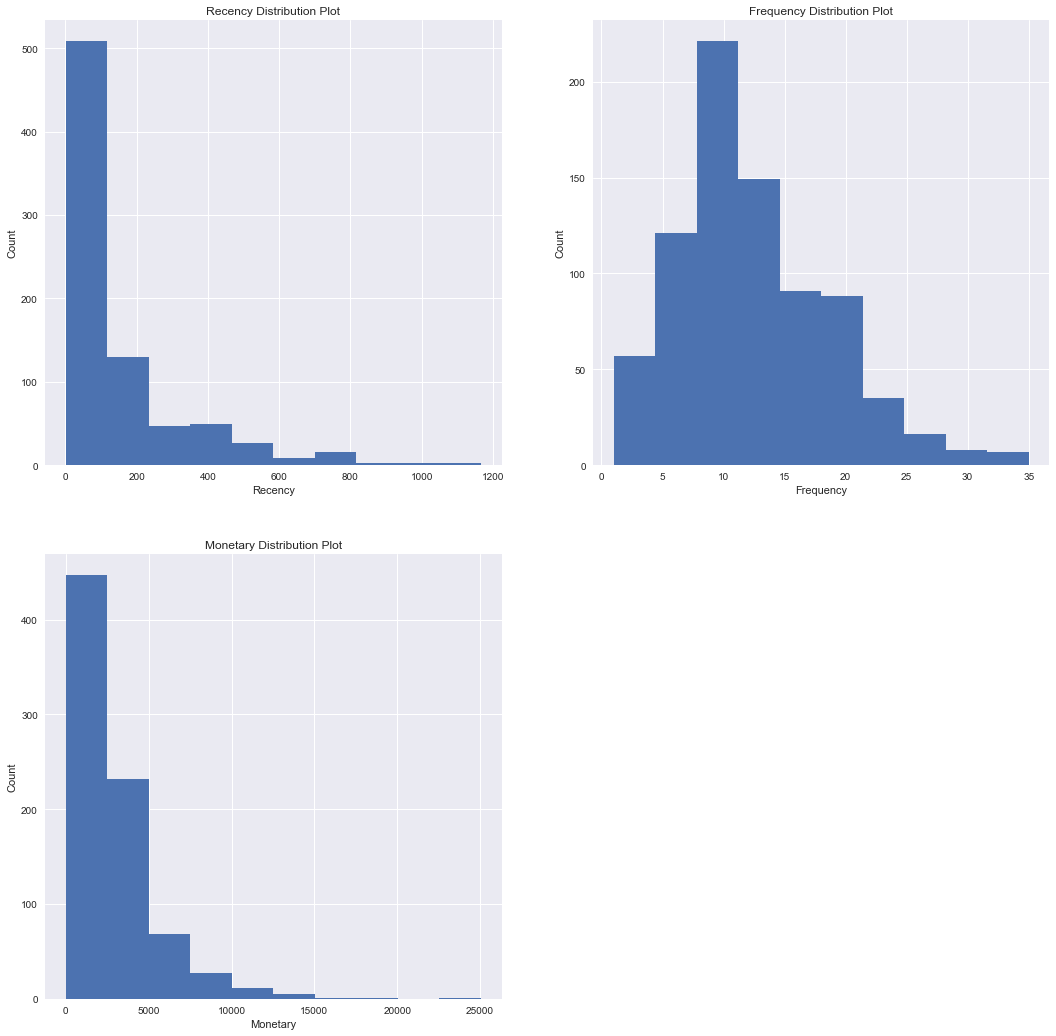

In [62]:
fig = plt.figure(figsize=(18,18))

ax1 = fig.add_subplot(221)
plt.hist(data['Recency'])
plt.title('Recency Distribution Plot')
plt.xlabel('Recency')
plt.ylabel('Count')


ax2 = fig.add_subplot(222)
plt.hist(data['Frequency'])
plt.title('Frequency Distribution Plot')
plt.xlabel('Frequency')
plt.ylabel('Count')


ax3 = fig.add_subplot(223)
plt.hist(data['Monetary'])
plt.title('Monetary Distribution Plot')
plt.xlabel('Monetary')
plt.ylabel('Count')

In [63]:
customer_sales = df.groupby('Customer Name').agg({'Segment':max, 'City':max, 'State':max, 'Region':max, 'Category':max, 'Sub-Category':max, 'Product Name': max, 'Sales':sum })
customer_sales.head(5)

,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
Customer Name,,,,,,,,
Aaron Bergman,Consumer,Seattle,Washington,West,Technology,Storage,"Sauder Facets Collection Library, Sky Alder Fi...",887
Aaron Hawkins,Corporate,Troy,Pennsylvania,West,Technology,Storage,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,1744
Aaron Smayling,Corporate,San Francisco,Virginia,West,Technology,Tables,Xerox 1998,3051
Adam Bellavance,Home Office,Waynesboro,Washington,West,Technology,Tables,Xerox 231,7757
Adam Hart,Corporate,New York City,Texas,West,Technology,Tables,Xerox 214,3251


# Findings

- 2018 had the highest sales and there is a steady increase in sales from 2016-2018 after a slight dip in from 2015-2016
- Sales genereally start increasing from the months of september.
- Delivery is averagely between 2-5 days of order date except for same day delivery orders
- Amongst the three segments, Consumer makes the most sales.
- There are three product categories with technology making the highest sales in each of the segment
- staple envelopes are the most bought product, Cisco TelePresence is the most expensive product
- in this notebook we analysed the west region which was the top performing region, however the same analyis can be done for the  rest of the regions
- the reason why the west has the highest sales could be because they also have the highest number of customers
- we also analysed customers grouped them according to their recency, frequency and amount they spend in the store. Majority of customers return between 0 and 200 days, most have frequented the shop between 0-20 times and on average most of their customers spend between 0-5000 dollars